In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### LOAD

In [3]:
# LQ800_results_16bins_beta = np.loadtxt('saved-results/LQup800GeV.txt')[0]
# LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[1]
# LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[2]

# LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup800GeV.txt')[9]
# LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[10]
# LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[11]

In [4]:
# LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[0]
# LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[1]
# LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[2]

# LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[9]
# LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[10]
# LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[11]

In [9]:
results_16bins_beta01 = [LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta01 = [LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta01 = [LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta01 = [LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta01 = [LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta01 = [LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta03 = [LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta03 = [LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta03 = [LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta03 = [LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta03 = [LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta03 = [LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta05 = [LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta05 = [LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta05 = [LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta05 = [LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta05 = [LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta05 = [LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta07 = [LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta07 = [LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta07 = [LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta07 = [LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta07 = [LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta07 = [LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta09 = [LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta09 = [LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta09 = [LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta09 = [LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta09 = [LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta09 = [LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]

In [10]:
results_16bins_beta01.append( (results_16bins_beta01[-1] - results_16bins_beta01[-2]) + results_16bins_beta01[-1] )
results_16bins_plus_beta01.append( (results_16bins_plus_beta01[-1] - results_16bins_plus_beta01[-2]) + results_16bins_plus_beta01[-1] )
results_16bins_min_beta01.append( (results_16bins_min_beta01[-1] - results_16bins_min_beta01[-2]) + results_16bins_min_beta01[-1] )

results_MLL_KDE_beta01.append( (results_MLL_KDE_beta01[-1] - results_MLL_KDE_beta01[-2]) + results_MLL_KDE_beta01[-1] )
results_MLL_KDE_plus_beta01.append( (results_MLL_KDE_plus_beta01[-1] - results_MLL_KDE_plus_beta01[-2]) + results_MLL_KDE_plus_beta01[-1] )
results_MLL_KDE_min_beta01.append( (results_MLL_KDE_min_beta01[-1] - results_MLL_KDE_min_beta01[-2]) + results_MLL_KDE_min_beta01[-1] )


results_16bins_beta03.append( (results_16bins_beta03[-1] - results_16bins_beta03[-2]) + results_16bins_beta03[-1] )
results_16bins_plus_beta03.append( (results_16bins_plus_beta03[-1] - results_16bins_plus_beta03[-2]) + results_16bins_plus_beta03[-1] )
results_16bins_min_beta03.append( (results_16bins_min_beta03[-1] - results_16bins_min_beta03[-2]) + results_16bins_min_beta03[-1] )

results_MLL_KDE_beta03.append( (results_MLL_KDE_beta03[-1] - results_MLL_KDE_beta03[-2]) + results_MLL_KDE_beta03[-1] )
results_MLL_KDE_plus_beta03.append( (results_MLL_KDE_plus_beta03[-1] - results_MLL_KDE_plus_beta03[-2]) + results_MLL_KDE_plus_beta03[-1] )
results_MLL_KDE_min_beta03.append( (results_MLL_KDE_min_beta03[-1] - results_MLL_KDE_min_beta03[-2]) + results_MLL_KDE_min_beta03[-1] )


results_16bins_beta05.append( (results_16bins_beta05[-1] - results_16bins_beta05[-2]) + results_16bins_beta05[-1] )
results_16bins_plus_beta05.append( (results_16bins_plus_beta05[-1] - results_16bins_plus_beta05[-2]) + results_16bins_plus_beta05[-1] )
results_16bins_min_beta05.append( (results_16bins_min_beta05[-1] - results_16bins_min_beta05[-2]) + results_16bins_min_beta05[-1] )

results_MLL_KDE_beta05.append( (results_MLL_KDE_beta05[-1] - results_MLL_KDE_beta05[-2]) + results_MLL_KDE_beta05[-1] )
results_MLL_KDE_plus_beta05.append( (results_MLL_KDE_plus_beta05[-1] - results_MLL_KDE_plus_beta05[-2]) + results_MLL_KDE_plus_beta05[-1] )
results_MLL_KDE_min_beta05.append( (results_MLL_KDE_min_beta05[-1] - results_MLL_KDE_min_beta05[-2]) + results_MLL_KDE_min_beta05[-1] )


results_16bins_beta07.append( (results_16bins_beta07[-1] - results_16bins_beta07[-2]) + results_16bins_beta07[-1] )
results_16bins_plus_beta07.append( (results_16bins_plus_beta07[-1] - results_16bins_plus_beta07[-2]) + results_16bins_plus_beta07[-1] )
results_16bins_min_beta07.append( (results_16bins_min_beta07[-1] - results_16bins_min_beta07[-2]) + results_16bins_min_beta07[-1] )

results_MLL_KDE_beta07.append( (results_MLL_KDE_beta07[-1] - results_MLL_KDE_beta07[-2]) + results_MLL_KDE_beta07[-1] )
results_MLL_KDE_plus_beta07.append( (results_MLL_KDE_plus_beta07[-1] - results_MLL_KDE_plus_beta07[-2]) + results_MLL_KDE_plus_beta07[-1] )
results_MLL_KDE_min_beta07.append( (results_MLL_KDE_min_beta07[-1] - results_MLL_KDE_min_beta07[-2]) + results_MLL_KDE_min_beta07[-1] )


results_16bins_beta09.append( (results_16bins_beta09[-1] - results_16bins_beta09[-2]) + results_16bins_beta09[-1] )
results_16bins_plus_beta09.append( (results_16bins_plus_beta09[-1] - results_16bins_plus_beta09[-2]) + results_16bins_plus_beta09[-1] )
results_16bins_min_beta09.append( (results_16bins_min_beta09[-1] - results_16bins_min_beta09[-2]) + results_16bins_min_beta09[-1] )

results_MLL_KDE_beta09.append( (results_MLL_KDE_beta09[-1] - results_MLL_KDE_beta09[-2]) + results_MLL_KDE_beta09[-1] )
results_MLL_KDE_plus_beta09.append( (results_MLL_KDE_plus_beta09[-1] - results_MLL_KDE_plus_beta09[-2]) + results_MLL_KDE_plus_beta09[-1] )
results_MLL_KDE_min_beta09.append( (results_MLL_KDE_min_beta09[-1] - results_MLL_KDE_min_beta09[-2]) + results_MLL_KDE_min_beta09[-1] )


<ipython-input-11-fdfce31ea7f4>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-fdfce31ea7f4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). T

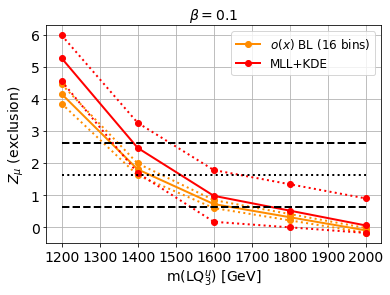

<ipython-input-11-fdfce31ea7f4>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-fdfce31ea7f4>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

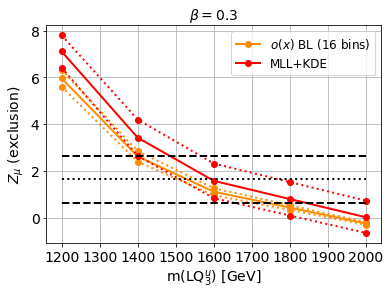

<ipython-input-11-fdfce31ea7f4>:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-fdfce31ea7f4>:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

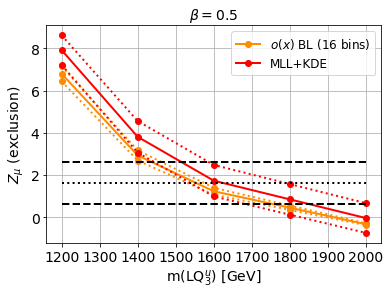

<ipython-input-11-fdfce31ea7f4>:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-fdfce31ea7f4>:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

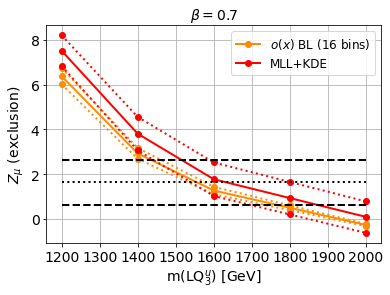

<ipython-input-11-fdfce31ea7f4>:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-fdfce31ea7f4>:102: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:103: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-11-fdfce31ea7f4>:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k

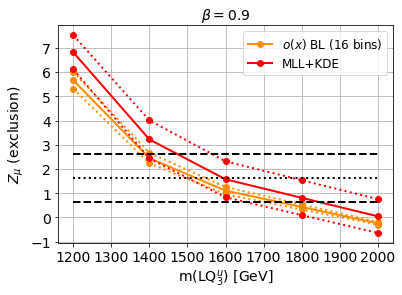

In [11]:
#masses = [800, 1000, 1200, 1400, 1600, 1800]
masses = [1200, 1400, 1600, 1800, 2000]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [12]:
# Interpolation, cubic
res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

In [13]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1400, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [14]:
beta = [0.1,0.3,0.5,0.7,0.9]


mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins = [mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09]
mass_16bins_plus = [mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09]
mass_16bins_min = [mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09]
mass_MLL = [mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09]
mass_MLL_plus = [mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09]
mass_MLL_min = [mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1420.581382171178, 1506.871180203525, 1533.599318951296, 1540.136011108282, 1495.912829765427]
[1443.4711759025042, 1533.3262332549914, 1560.6618762656828, 1567.6199380865878, 1526.0600447825584]
[1397.5778920064747, 1480.5406526576014, 1505.9534917692483, 1512.3645268894581, 1467.9046813051252]
[1490.827254733334, 1588.5905932803187, 1614.4775749628488, 1622.4898620758531, 1588.3146104307202]
[1637.9342270934255, 1764.7990766990188, 1783.4287024944651, 1804.7262856638356, 1771.336422166056]
[1404.6977221149714, 1488.0924631473144, 1517.6782594342535, 1522.2875610790397, 1474.8528721198263]


In [15]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998
beta_ATLAS = [0,0.0010521,0.0057888,0.010101,0.011322,0.017524,0.020202,0.024171,0.030303,0.030715,0.036537,0.040404,0.040997,0.044161,0.046326,0.048202,0.050505,0.050582,0.054423,0.060033,0.060606,0.067623,0.070707,0.076512,0.080808,0.086018,0.090909,0.095446,0.10101,0.10447,0.11111,0.11342,0.12121,0.12329,0.13131,0.13566,0.14141,0.15152,0.15223,0.16162,0.17172,0.17465,0.18182,0.19192,0.20202,0.20219,0.21212,0.22222,0.23232,0.23273,0.24242,0.25253,0.26263,0.26544,0.27273,0.28283,0.29293,0.30231,0.30303,0.31313,0.32323,0.33333,0.34343,0.34742,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41214,0.41414,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.55654,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68687,0.69697,0.70707,0.71717,0.72683,0.72727,0.73737,0.74747,0.75758,0.76768,0.77778,0.78788,0.79798,0.80808,0.81818,0.82828,0.83838,0.84848,0.85859,0.86424,0.86869,0.87879,0.88889,0.89899,0.90909,0.91919,0.92929,0.93939,0.9444,0.94949,0.9596,0.9697,0.9798,0.9899,1]
mass_Z95CL_ATLAS = [751.02,755.56,771.72,784.32,787.88,804.04,810.61,820.2,835.38,836.36,852.53,866.65,868.69,884.85,901.01,917.17,932.86,933.33,949.49,965.66,966.99,981.82,987.79,997.98,1005.7,1014.1,1023,1030.3,1040.7,1046.5,1058.9,1062.6,1075.8,1078.8,1089.8,1094.9,1101.1,1110.5,1111.1,1118.4,1125.4,1127.3,1131.9,1137.8,1143.3,1143.4,1149,1154.3,1159.4,1159.6,1164.6,1169.6,1174.5,1175.8,1179.1,1183.7,1188,1191.9,1192.2,1196.1,1199.8,1203.4,1206.8,1208.1,1210,1212.9,1215.6,1218.1,1220.5,1222.6,1224.2,1224.7,1226.6,1228.3,1229.9,1231.3,1232.7,1233.9,1235,1236,1236.9,1237.7,1238.5,1239.2,1239.8,1240.4,1240.4,1241,1241.5,1242,1242.4,1242.8,1243.1,1243.3,1243.4,1243.5,1243.5,1243.3,1243.1,1242.8,1242.3,1241.8,1241.1,1240.4,1240.4,1239.7,1238.9,1238,1237.1,1236.1,1235.1,1233.9,1232.7,1231.4,1230,1228.6,1227,1225.3,1224.2,1223.5,1221.8,1219.9,1217.9,1215.9,1213.8,1211.5,1209.2,1208.1,1206.8,1204.4,1201.8,1199.3,1196.7,1194.1]

beta_ATLAS_plus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_plus1sig = [500,950,1050,1100,1125,1145,1150,1150,1140,1130,1100]

beta_ATLAS_minus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_minus1sig = [800,1120,1210,1250,1290,1315,1325,1330,1325,1310,1260]

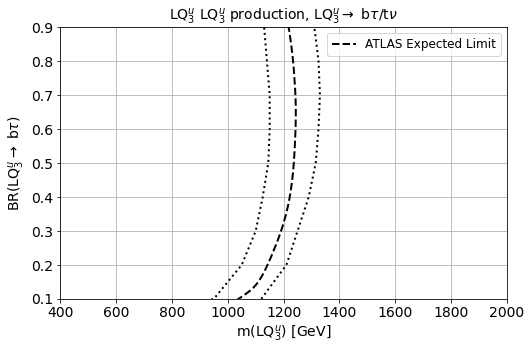

In [16]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<ipython-input-17-72da3eef3c85>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-17-72da3eef3c85>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-17-72da3eef3c85>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-17-72da3eef3c85>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedenc

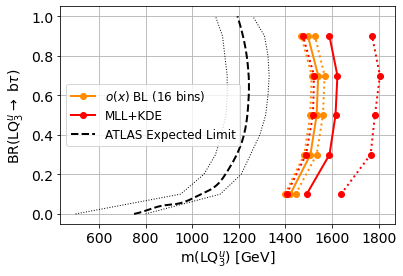

In [17]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

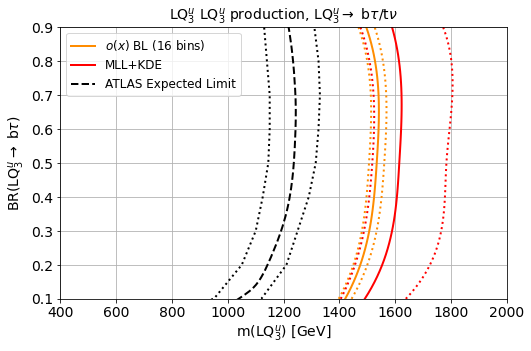

In [18]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='cubic')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='cubic')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='cubic')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='cubic')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='cubic')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='cubic')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

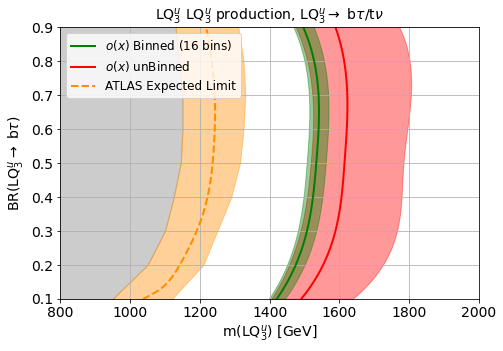

In [19]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('exclusion_LQup_14TeV_300fb.pdf', bbox_inches='tight')
plt.show()

In [20]:
mass_Z95CL_16bins(plotX_beta)

array([1420.58138217, 1431.22086809, 1441.11549557, 1450.29619318,
       1458.79388943, 1466.63951288, 1473.86399206, 1480.49825551,
       1486.57323178, 1492.11984941, 1497.16903693, 1501.75172288,
       1505.89883582, 1509.64130427, 1513.01005677, 1516.03602187,
       1518.75012812, 1521.18330403, 1523.36647817, 1525.33057907,
       1527.10653526, 1528.72527529, 1530.21772771, 1531.61482104,
       1532.94748384, 1534.2454557 , 1535.51113066, 1536.71955723,
       1537.84459495, 1538.86010337, 1539.73994205, 1540.45797054,
       1540.98804838, 1541.30403514, 1541.37979036, 1541.1891736 ,
       1540.7060444 , 1539.90426233, 1538.75768692, 1537.24017775,
       1535.32559434, 1532.98779627, 1530.20064308, 1526.93799432,
       1523.17370954, 1518.88164831, 1514.03567016, 1508.60963465,
       1502.57740133, 1495.91282977])

In [21]:
mass_Z95CL_16bins_plus(plotX_beta)

array([1443.4711759 , 1454.58106645, 1464.90890074, 1474.48716175,
       1483.3483325 , 1491.52489599, 1499.04933521, 1505.95413317,
       1512.27177287, 1518.03473731, 1523.27550949, 1528.02657242,
       1532.32040909, 1536.18950251, 1539.66633567, 1542.78339159,
       1545.57315326, 1548.06810368, 1550.30072585, 1552.30350278,
       1554.10891746, 1555.74945291, 1557.25759211, 1558.66581808,
       1560.0066138 , 1561.31126752, 1562.58358755, 1563.79990235,
       1564.93534558, 1565.9650509 , 1566.864152  , 1567.60778252,
       1568.17107614, 1568.52916653, 1568.65718735, 1568.53027226,
       1568.12355495, 1567.41216906, 1566.37124827, 1564.97592625,
       1563.20133666, 1561.02261317, 1558.41488944, 1555.35329914,
       1551.81297595, 1547.76905352, 1543.19666552, 1538.07094562,
       1532.36702748, 1526.06004478])

In [22]:
mass_Z95CL_16bins_min(plotX_beta)

array([1397.57789201, 1407.85353668, 1417.4020279 , 1426.25391205,
       1434.43973557, 1441.99004484, 1448.9353863 , 1455.30630633,
       1461.13335137, 1466.44706781, 1471.27800207, 1475.65670056,
       1479.61370968, 1483.17957585, 1486.38484549, 1489.26006499,
       1491.83578076, 1494.14253923, 1496.2108868 , 1498.07136988,
       1499.75453488, 1501.29092821, 1502.71109628, 1504.0455855 ,
       1505.32494229, 1506.57851597, 1507.80812323, 1508.98804805,
       1510.09137737, 1511.09119811, 1511.96059721, 1512.67266159,
       1513.20047818, 1513.51713391, 1513.5957157 , 1513.40931048,
       1512.93100518, 1512.13388674, 1510.99104206, 1509.4755581 ,
       1507.56052176, 1505.21901999, 1502.4241397 , 1499.14896783,
       1495.3665913 , 1491.05009705, 1486.17257199, 1480.70710307,
       1474.62677719, 1467.90468131])

In [23]:
mass_Z95CL_MLL(plotX_beta)

array([1490.82725473, 1503.26586664, 1514.77519846, 1525.39527723,
       1535.16612995, 1544.12778365, 1552.32026534, 1559.78360203,
       1566.55782074, 1572.6829485 , 1578.19901231, 1583.14603919,
       1587.56405617, 1591.49309025, 1594.97316846, 1598.0443178 ,
       1600.7465653 , 1603.11993798, 1605.20446285, 1607.04016692,
       1608.66707722, 1610.12522076, 1611.45462455, 1612.69531562,
       1613.88732098, 1615.06933632, 1616.24943688, 1617.40507739,
       1618.51238131, 1619.54747206, 1620.48647308, 1621.30550781,
       1621.98069966, 1622.48817209, 1622.80404852, 1622.90445239,
       1622.76550713, 1622.36333618, 1621.67406296, 1620.67381092,
       1619.33870348, 1617.64486409, 1615.56841616, 1613.08548315,
       1610.17218848, 1606.80465558, 1602.95900789, 1598.61136885,
       1593.73786189, 1588.31461043])

In [24]:
mass_Z95CL_MLL_plus(plotX_beta)

array([1637.93422709, 1656.0142501 , 1672.43685781, 1687.28526336,
       1700.64267987, 1712.59232047, 1723.21739828, 1732.60112643,
       1740.82671804, 1747.97738624, 1754.13634415, 1759.3868049 ,
       1763.81198161, 1767.49508741, 1770.51933543, 1772.96793878,
       1774.9241106 , 1776.471064  , 1777.69201212, 1778.67016808,
       1779.488745  , 1780.23095601, 1780.98001423, 1781.8191328 ,
       1782.83152483, 1784.0975431 , 1785.63175237, 1787.38292936,
       1789.29699047, 1791.31985209, 1793.39743058, 1795.47564235,
       1797.50040377, 1799.41763123, 1801.17324111, 1802.71314981,
       1803.9832737 , 1804.92952917, 1805.4978326 , 1805.63410039,
       1805.28424891, 1804.39419455, 1802.90985369, 1800.77714272,
       1797.94197803, 1794.350276  , 1789.94795301, 1784.68092545,
       1778.49510971, 1771.33642217])

In [25]:
mass_Z95CL_MLL_min(plotX_beta)

array([1404.69772211, 1414.54852842, 1423.77878064, 1432.41176564,
       1440.47077028, 1447.97908142, 1454.95998593, 1461.43677067,
       1467.43272249, 1472.97112826, 1478.07527484, 1482.76844909,
       1487.07393788, 1491.01502805, 1494.61500648, 1497.89716003,
       1500.88477556, 1503.60113992, 1506.06953998, 1508.31326261,
       1510.35559465, 1512.21982298, 1513.92923446, 1515.50711594,
       1516.97675429, 1518.36048608, 1519.65879138, 1520.85029373,
       1521.91266638, 1522.82358259, 1523.56071563, 1524.10173874,
       1524.42432518, 1524.50614823, 1524.32488112, 1523.85819712,
       1523.08376949, 1521.97927149, 1520.52237637, 1518.69075739,
       1516.46208781, 1513.81404088, 1510.72428988, 1507.17050804,
       1503.13036864, 1498.58154493, 1493.50171016, 1487.8685376 ,
       1481.6597005 , 1474.85287212])